# ENUNCIADO DA QUESTÃO

Missão AstroJúnior: explorando novos mundos!

No ano de 2075, a humanidade expandiu suas viagens pelo universo, e jovens cadetes da Academia Espacial foram selecionados para a grande Missão AstroJúnior. Seu objetivo: explorar planetas desconhecidos e coletar dados para ajudar cientistas da Terra a entender esses novos mundos.

Cada equipe recebeu um conjunto de sensores de alta tecnologia para medir diferentes aspectos dos planetas visitados. Os dados coletados foram processados e codificados em uma escala numérica própria de modo a refletir as seguintes grandezas:


TempMédia - Temperatura média do planeta (em graus Celsius);

Gravidade - Intensidade da gravidade em relação à Terra;

PressãoAtm - Pressão atmosférica (em atmosferas terrestres);

Radiação - Nível de radiação presente no planeta;

ComposiçãoAr - Percentual de gases essenciais para a vida humana;

Hidratação - Disponibilidade de água líquida;

Vegetação - Presença de organismos vegetais;

Fauna - Diversidade de formas de vida animal;

SoloFértil - Capacidade do solo de sustentar plantação;

Ventos - Intensidade dos ventos planetários;

Luas - Número de luas orbitando o planeta;

Magnetismo - Força do campo magnético do planeta;

ClimaEstável - Estabilidade das condições climáticas ao longo do tempo;



Com base nesses dados, os cientistas classificarão os planetas em cinco categorias principais:

Classe 0: Planeta Deserto - Muito quente ou frio, sem água e com poucas chances de vida.

Classe 1: Planeta Vulcânico - Alta atividade geotérmica e atmosfera hostil.

Classe 2: Planeta Oceânico - Coberto por vastos oceanos, com possibilidades de vida aquática.

Classe 3: Planeta Florestal - Rico em vegetação, similar à Terra em muitos aspectos.

Classe 4: Planeta Gelado - Extremamente frio, mas com possibilidade de vida subterrânea ou em oceanos sob o gelo.


Agora, cadete, sua missão é analisar os dados coletados e ajudar a classificar cada planeta corretamente. O futuro da exploração espacial está em suas mãos!

A planilha de treinamento (treino.csv) fornecida tem 10.501 linhas e 13 colunas. 

A Figura 1 acima apresenta um pedaço do conjunto de treinamento. A coluna id identifica cada uma das instâncias individualmente, apresentando valores entre 0 a 10.499. A coluna target apresenta valores de 0 a 4, conforme a classificação das categorias de planetas apresentadas anteriormente.

Após treinar o seu modelo, você deve realizar a predição da planilha de teste (teste.csv). A planilha de teste fornecida tem 4.501 linhas e 13 características das instâncias (colunas). Ela contém informações semelhantes à planilha de treinamento, mas é fornecida sem os rótulos (“target”), ou seja, sem as categorias de planetas.

Quando você julgar que criou um modelo competitivo envie suas predições para as categorias dos planetas pela plataforma utilizando um arquivo com a extensão .csv no formato exato como descrito a seguir:

O arquivo .csv deve conter precisamente 4.501 linhas e 2 colunas
Na primeira célula da primeira coluna deve estar escrito a palavra id
Na primeira célula da segunda coluna deve estar escrito a palavra target
Cada linha desse arquivo, com exceção da primeira, deve conter na célula da primeira coluna o “id” (ou seja, um número correspondente à instância) e na célula da segunda coluna o “target” (0, 1, 2, 3, 4)

id, target 
onde:

O id representa o identificador único;
, [vírgula] o separador das duas colunas;
O target, um valor inteiro que pode ser: 4 (Planeta Gelado), 3 (Planeta Florestal), 2 (Planeta Oceânico), 1 (Planeta Vulcânico) ou 0 (Planeta Deserto).


Além do upload do arquivo .csv no local específico para isso, é obrigatório o envio de um pequeno relatório descrevendo: (1) o software/biblioteca utilizada, (2) os passos que o participante utilizou para criar o modelo e (3) explicar os motivos pelos quais determinadas decisões de modelagem foram tomadas. A estrutura do texto, a ser digitado no espaço específico para isso, deve possuir seguinte estrutura:

Software / Biblioteca utilizado: Orange / Scikit-learn
Passos da resolução da Prova: 1. Carregar os dados de treinamento. 2. … 3. …. 
Explicação da escolha do algoritmo de Aprendizado de Máquina: Escolhi Árvore de Decisão porque …


Os resultados serão avaliados pelo desempenho de suas predições sobre o conjunto de teste, utilizando a métrica “Medida-F”.

A Medida-F é a média harmônica entre as métricas de Precisão e Revocação. Em outras palavras, a Medida-F é uma métrica que avalia o desempenho de um modelo preditivo de modo a trazer um número único que indique a sua qualidade geral. 

O arquivo deve ser um CSV com as colunas 'id' e 'target', contendo uma linha para cada previsão (0, 1, 2, etc.)

In [16]:
# passo a passo


# passo 0: entender a empresa e o seu desafio
# passo 1: impotar a base de dados 
import pandas as pd
import numpy as np
import pickle


tabela = pd.read_csv('treino.csv')
display(tabela)

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,target
0,12251,38.763463,4.372530,2.888516,12.352539,18.906550,9.605924,3.456596,3.959477,4.738227,3.692509,11.192263,9.076242,4.692962,2
1,4529,32.192181,3.158109,2.134617,16.193530,26.786878,9.347958,5.093277,6.893790,3.399840,2.080853,19.486692,12.349952,3.217670,0
2,11284,28.370782,3.006067,1.969280,15.163950,28.515109,7.946870,5.609813,6.511194,3.256799,2.290993,18.405205,14.781329,3.231217,0
3,10993,38.215409,2.174232,2.935104,11.501867,18.419571,7.954005,4.229832,4.522060,4.869234,3.383514,12.782517,17.343742,5.009182,2
4,12927,38.904545,2.956164,2.253149,12.282552,25.547887,8.168776,3.653026,6.809110,4.971130,2.127363,19.247327,20.115183,3.560524,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,6951,30.605226,2.172545,1.456766,15.916774,33.872292,7.766799,4.455944,4.866775,5.274495,3.194181,13.756923,15.133962,4.489715,4
10496,8097,37.153719,2.930280,2.514520,10.042402,22.815845,6.018057,5.359753,5.656202,3.601738,2.760592,15.988397,19.794919,3.752870,2
10497,9011,24.316856,2.771631,2.018644,16.082389,27.999121,6.014674,6.209202,4.304756,3.905507,3.502867,12.168262,6.530749,5.191197,0
10498,12617,44.748792,3.174414,1.447737,13.578811,33.966677,8.671664,4.754359,7.941178,3.325981,1.505581,22.447345,21.038993,1.795912,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10500 non-null  int64  
 1   col_0   10500 non-null  float64
 2   col_1   10500 non-null  float64
 3   col_2   10500 non-null  float64
 4   col_3   10500 non-null  float64
 5   col_4   10500 non-null  float64
 6   col_5   10500 non-null  float64
 7   col_6   10500 non-null  float64
 8   col_7   10500 non-null  float64
 9   col_8   10500 non-null  float64
 10  col_9   10500 non-null  float64
 11  col_10  10500 non-null  float64
 12  col_11  10500 non-null  float64
 13  col_12  10500 non-null  float64
 14  target  10500 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.2 MB
Distribuição das classes: Counter({0: 3787, 4: 1202, 1: 1197, 2: 1069, 3: 620})


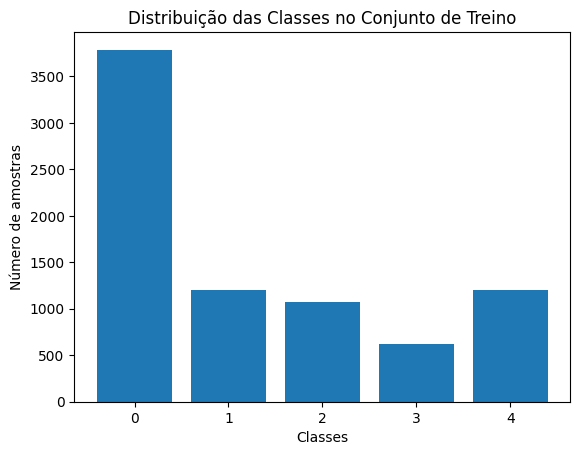

In [17]:
# passo 2: preparar a base de dados para a IA
tabela.info()

# y e quem eu quero prever
y = tabela['target']

# x e o que eu tenho para prever
x = tabela.drop(columns=['id','target'])

#separar dados de treino e dados de teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

# comferindo a calidade dos dados
import matplotlib.pyplot as plt
from collections import Counter

# Contar quantas amostras há em cada classe
class_counts = Counter(y_treino)
print("Distribuição das classes:", class_counts)

# Visualizar com um gráfico de barras
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Número de amostras")
plt.title("Distribuição das Classes no Conjunto de Treino")
plt.show()

from sklearn.preprocessing import StandardScaler

# Criar o normalizador (usando StandardScaler, pois funciona bem para SVM e redes neurais)
scaler = StandardScaler()

# Criar uma cópia dos dados originais
x_treino = x_treino.copy()
x_teste = x_teste.copy()

# Normalizar apenas para os modelos que precisam
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)



In [18]:
# passo 3: treinar a IA 
# criar modelo

#importar modelo
#nao distancia
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#distancia
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#nao se saiu bem 
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression

#importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [19]:

#criar IA
modelo_arvore = DecisionTreeClassifier()
modelo_floresta = RandomForestClassifier()
modelo_xgboost = XGBClassifier(objective='multi:softprob', learning_rate=0.1, n_estimators=500, 
                               max_depth=6, min_child_weight=1, colsample_bytree=0.8, subsample=0.8, gamma=0.1)
modelo_knn = KNeighborsClassifier()
modelo_svm = SVC()

#treinar IA
modelo_arvore.fit(x_treino, y_treino)
modelo_floresta.fit(x_treino, y_treino)
modelo_xgboost.fit(x_treino, y_treino)
modelo_knn.fit(x_treino_normalizado, y_treino)
modelo_svm.fit(x_treino_normalizado, y_treino)


SVC()

In [20]:
# passo 4: qual o melhor modelo de IA
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_floresta = modelo_floresta.predict(x_teste)
previsao_xgboost = modelo_xgboost.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste_normalizado) 
previsao_svm = modelo_svm.predict(x_teste_normalizado)

print(classification_report(y_teste, previsao_arvore))
print(classification_report(y_teste, previsao_floresta))
print(classification_report(y_teste, previsao_xgboost))
print(classification_report(y_teste, previsao_knn))
print(classification_report(y_teste, previsao_svm))

print(confusion_matrix(y_teste, previsao_arvore))
print(confusion_matrix(y_teste, previsao_floresta))
print(confusion_matrix(y_teste, previsao_xgboost))
print(confusion_matrix(y_teste, previsao_knn))
print(confusion_matrix(y_teste, previsao_svm))


              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1309
           1       0.50      0.52      0.51       396
           2       0.52      0.46      0.49       320
           3       0.37      0.40      0.39       193
           4       0.52      0.55      0.53       407

    accuracy                           0.63      2625
   macro avg       0.54      0.54      0.54      2625
weighted avg       0.63      0.63      0.63      2625

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1309
           1       0.72      0.62      0.66       396
           2       0.68      0.60      0.64       320
           3       0.79      0.37      0.50       193
           4       0.73      0.63      0.68       407

    accuracy                           0.76      2625
   macro avg       0.74      0.63      0.67      2625
weighted avg       0.76      0.76      0.75      2625

              precisio

In [22]:
# Preparativos para o modelo XGBoost 
classes, counts = np.unique(y_treino, return_counts=True)
total_samples = len(y_treino)
scale_pos_weights = total_samples / counts

# Novo treinamento com ajustes via RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# --- Ajuste de hiperparâmetros para Random Forest ---
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_tuner = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
rf_tuner.fit(x_treino, y_treino)
best_rf_params = rf_tuner.best_params_
print("Melhores parâmetros Random Forest:", best_rf_params)

# Treinamento final com os melhores parâmetros para Random Forest
modelo_floresta2 = RandomForestClassifier(
    **best_rf_params, 
    class_weight='balanced', 
    random_state=42
)
modelo_floresta2.fit(x_treino, y_treino)


c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

Melhores parâmetros Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 317}


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       min_samples_split=8, n_estimators=317, random_state=42)

In [24]:
# --- Ajuste de hiperparâmetros para XGBoost ---
param_dist_xgb = {
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'colsample_bytree': uniform(0.6, 0.4),
    'subsample': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.2)
}

xgb_tuner = RandomizedSearchCV(
    estimator=XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric="logloss"),
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
xgb_tuner.fit(x_treino, y_treino)
best_xgb_params = xgb_tuner.best_params_
print("Melhores parâmetros XGBoost:", best_xgb_params)

# Treinamento final com os melhores parâmetros para XGBoost
modelo_xgboost2 = XGBClassifier(
    **best_xgb_params,
    objective='multi:softprob',
    scale_pos_weight=scale_pos_weights,  # Inclua se necessário para compensar o desbalanceamento
    use_label_encoder=False,
    eval_metric="logloss"
)
modelo_xgboost2.fit(x_treino, y_treino)

c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores parâmetros XGBoost: {'colsample_bytree': np.float64(0.7760609974958406), 'gamma': np.float64(0.024407646968955768), 'learning_rate': np.float64(0.10903538202225403), 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 305, 'subsample': np.float64(0.7564242430292963)}


c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7760609974958406), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=np.float64(0.024407646968955768), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.10903538202225403), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=305, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
# --- Ajuste de hiperparâmetros para KNN ---
param_dist_knn = {
    'n_neighbors': randint(3, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_tuner = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
knn_tuner.fit(x_treino_normalizado, y_treino)
best_knn_params = knn_tuner.best_params_
print("Melhores parâmetros KNN:", best_knn_params)

# Treinamento final com os melhores parâmetros para KNN
modelo_knn2 = KNeighborsClassifier(
    **best_knn_params
)
modelo_knn2.fit(x_treino_normalizado, y_treino)


Melhores parâmetros KNN: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

In [40]:
# --- Ajuste de hiperparâmetros para SVM ---
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 3))  # Valores de gamma
}

svm_tuner = RandomizedSearchCV(
    estimator=SVC(class_weight='balanced', probability=True, random_state=42),
    param_distributions=param_dist_svm,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
svm_tuner.fit(x_treino_normalizado, y_treino)
best_svm_params = svm_tuner.best_params_
print("Melhores parâmetros SVM:", best_svm_params)

# Treinamento final com os melhores parâmetros para SVM
modelo_svm2 = SVC(
    **best_svm_params,
    class_weight='balanced',
    probability=True,
    random_state=42
)
modelo_svm2.fit(x_treino_normalizado, y_treino)


Melhores parâmetros SVM: {'kernel': 'rbf', 'gamma': np.float64(0.31622776601683794), 'C': 1}


SVC(C=1, class_weight='balanced', gamma=np.float64(0.31622776601683794),
    probability=True, random_state=42)

In [41]:
previsao_floresta2 = modelo_floresta2.predict(x_teste)
previsao_xgboost2 = modelo_xgboost2.predict(x_teste)
previsao_knn2 = modelo_knn2.predict(x_teste_normalizado)
previsao_svm2 = modelo_svm2.predict(x_teste_normalizado)

In [48]:
# Criar um dicionário com os melhores hiperparâmetros
melhores_hiperparametros = {
    'RandomForest': best_rf_params,
    'XGBoost': best_xgb_params,
    'KNN': best_knn_params,
    'SVM': best_svm_params
}

# Salvar os hiperparâmetros em um arquivo pickle
with open('melhores_hiperparametros.pkl', 'wb') as arquivo:
    pickle.dump(melhores_hiperparametros, arquivo)

print("Hiperparâmetros salvos com sucesso!")

Hiperparâmetros salvos com sucesso!


In [49]:
import json

# Salvar os hiperparâmetros em um arquivo JSON
with open('melhores_hiperparametros.json', 'w', encoding='utf-8') as arquivo_json:
    json.dump(melhores_hiperparametros, arquivo_json, indent=4, ensure_ascii=False)

print("Hiperparâmetros salvos em formato JSON com sucesso!")

Hiperparâmetros salvos em formato JSON com sucesso!


In [44]:
# passo 4: qual o melhor modelo de IA com ajustes

previsao_floresta2 = modelo_floresta2.predict(x_teste)
previsao_xgboost2 = modelo_xgboost2.predict(x_teste) 
previsao_knn2 = modelo_knn2.predict(x_teste_normalizado)
previsao_svm2 = modelo_svm2.predict(x_teste_normalizado)

print(classification_report(y_teste, previsao_floresta2))
print(classification_report(y_teste, previsao_xgboost2))
print(classification_report(y_teste, previsao_knn2))
print(classification_report(y_teste, previsao_svm2))

print(confusion_matrix(y_teste, previsao_floresta2))
print(confusion_matrix(y_teste, previsao_xgboost2))
print(confusion_matrix(y_teste, previsao_knn2))
print(confusion_matrix(y_teste, previsao_svm2))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1309
           1       0.70      0.68      0.69       396
           2       0.67      0.63      0.65       320
           3       0.63      0.48      0.54       193
           4       0.71      0.70      0.71       407

    accuracy                           0.77      2625
   macro avg       0.71      0.68      0.69      2625
weighted avg       0.77      0.77      0.77      2625

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1309
           1       0.73      0.66      0.70       396
           2       0.69      0.63      0.66       320
           3       0.72      0.45      0.56       193
           4       0.74      0.70      0.72       407

    accuracy                           0.78      2625
   macro avg       0.74      0.67      0.70      2625
weighted avg       0.78      0.78      0.77      2625

              precisio

In [50]:
from sklearn.metrics import f1_score

# Calcular o F1-score médio para cada modelo
f1_floresta2 = f1_score(y_teste, previsao_floresta2, average='macro')
f1_xgboost2 = f1_score(y_teste, previsao_xgboost2, average='macro')
f1_knn2 = f1_score(y_teste, previsao_knn2, average='macro')
f1_svm2 = f1_score(y_teste, previsao_svm2, average='macro')

# Exibir os resultados
print("F1-score médio (Random Forest):", f1_floresta2)
print("F1-score médio (XGBoost):", f1_xgboost2)
print("F1-score médio (KNN):", f1_knn2)
print("F1-score médio (SVM):", f1_svm2)

# Identificar o melhor modelo
melhor_modelo = max(
    [('Random Forest', f1_floresta2), 
     ('XGBoost', f1_xgboost2), 
     ('KNN', f1_knn2), 
     ('SVM', f1_svm2)], 
    key=lambda x: x[1]
)

print("O melhor modelo é:", melhor_modelo[0], "com F1-score médio de:", melhor_modelo[1])

F1-score médio (Random Forest): 0.6934007470344159
F1-score médio (XGBoost): 0.7019676405620782
F1-score médio (KNN): 0.7156818567948633
F1-score médio (SVM): 0.7435798061815329
O melhor modelo é: SVM com F1-score médio de: 0.7435798061815329


In [51]:
# passo 5: usar o melhor modelo para faser a previsao
# qual o melhor modelo? 

#importar tabela de novos cliemtes
tabela_para_teste = pd.read_csv('teste.csv')

# Armazena a coluna 'id' separadamente
ids = tabela_para_teste["id"]

# Remove a coluna 'id' antes da previsão
tabela_para_teste_sem_id = tabela_para_teste.drop(columns=['id'], errors='ignore')

# Faz a previsão
nova_previsao = modelo_svm.predict(tabela_para_teste_sem_id)

# Criar um DataFrame com os IDs e as previsões
resultado = pd.DataFrame({"id": ids, "target": nova_previsao})

display(tabela_para_teste)

display(nova_previsao)

# Exibir o resultado
display(resultado)

c:\Users\geral\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12
0,2142,37.555079,3.205281,1.583984,11.330132,32.542511,6.581602,5.524091,5.202632,3.288405,3.009713,14.706292,20.530879,2.889453
1,3846,28.933095,3.905861,2.171001,14.644065,26.406560,9.515010,4.023027,6.528586,4.202300,2.281440,18.454367,14.862851,3.183574
2,6177,37.082903,3.259937,1.887675,12.313557,29.368109,6.533770,5.088085,5.913968,3.925079,2.619016,16.717026,16.871735,3.512345
3,11779,24.011327,4.599539,2.102587,17.349264,27.121683,12.231295,2.664319,5.226405,5.232794,2.996656,14.773491,9.133299,3.739929
4,1593,31.403592,2.543982,0.533288,14.778941,43.525198,5.225097,7.100292,4.516120,2.753415,3.386776,12.765727,16.675742,3.000528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,11496,37.789367,3.511433,2.814992,10.697124,19.675079,9.844242,3.994824,5.082404,3.762631,3.075747,14.366443,20.097503,3.278142
4496,8856,24.889203,2.508254,2.525974,15.868246,22.696114,6.931519,7.380456,6.599213,1.865822,2.242648,18.654010,10.229343,3.687254
4497,4937,39.208404,2.843656,1.975679,14.071951,28.448221,7.391533,5.525009,3.912253,3.788423,3.718447,11.058774,10.266351,4.531029
4498,7574,24.559490,2.084494,3.359952,12.531981,13.978740,6.302277,6.162282,4.496384,3.523565,3.397616,12.709938,12.636072,5.461903


array([0, 0, 0, ..., 0, 0, 0], shape=(4500,))

,id,target
0,2142,0
1,3846,0
2,6177,0
3,11779,0
4,1593,0
...,...,...
4495,11496,0
4496,8856,0
4497,4937,0
4498,7574,0


In [ ]:
# Salvando para CSV
df = pd.DataFrame(resultado)

df.to_csv("resposta.csv", index=False, header=True, encoding="utf-8")




In [ ]:
Seu código já está bem estruturado e cobre uma ampla gama de modelos e técnicas de ajuste de hiperparâmetros. 
No entanto, há algumas sugestões que podem ajudar a melhorar o desempenho do modelo e o F1-score no conjunto de teste:

### Melhorias no Código:
1. **Adicionar mais modelos**:
    - Você pode testar outros modelos como:
      - **Gradient Boosting** (`sklearn.ensemble.GradientBoostingClassifier`)
      - **LightGBM** (`lightgbm.LGBMClassifier`)
      - **CatBoost** (`catboost.CatBoostClassifier`)

2. **Balanceamento de classes**:
    - O desbalanceamento de classes pode impactar o desempenho. Experimente técnicas como:
      - **Oversampling** com `SMOTE` (`imblearn.over_sampling.SMOTE`)
      - **Undersampling** com `RandomUnderSampler` (`imblearn.under_sampling.RandomUnderSampler`)

3. **Feature Engineering**:
    - Verifique se há correlação entre as variáveis e remova as altamente correlacionadas.
    - Experimente criar novas features baseadas nas existentes.

4. **Cross-validation mais robusta**:
    - Use `StratifiedKFold` para garantir que a distribuição das classes seja mantida em cada divisão.

5. **Ensemble de modelos**:
    - Combine os melhores modelos usando técnicas como:
      - **VotingClassifier** (votação majoritária ou ponderada).
      - **StackingClassifier** (empilhamento de modelos).

6. **Ajuste de hiperparâmetros mais refinado**:
    - Após o `RandomizedSearchCV`, use `GridSearchCV` para refinar os melhores parâmetros encontrados.

7. **Normalização para todos os modelos**:
    - Certifique-se de que todas as variáveis estejam normalizadas para modelos sensíveis a escala, como SVM, KNN e redes neurais.

8. **Análise de importância de features**:
    - Use `feature_importances_` (para modelos baseados em árvores) ou `SHAP` para identificar as features mais relevantes.

---

### Estratégias para Melhorar o F1-Score:
1. **Aumentar os dados de treinamento**:
    - Se possível, colete mais dados ou use técnicas de **data augmentation**.

2. **Ajustar o peso das classes**:
    - Para modelos como SVM, Random Forest e XGBoost, ajuste o parâmetro `class_weight` ou `scale_pos_weight`.

3. **Reduzir overfitting**:
    - Use regularização (como `alpha` e `lambda` no XGBoost).
    - Experimente técnicas como `Dropout` em redes neurais.

4. **Avaliar métricas intermediárias**:
    - Analise a matriz de confusão para identificar classes com baixo desempenho e ajuste o modelo para essas classes.

---

### Relatório Escrito:
1. **Software/Biblioteca utilizada**:
    - Liste todas as bibliotecas usadas, como `scikit-learn`, `xgboost`, `matplotlib`, etc.

2. **Passos da resolução**:
    - Explique cada etapa do pipeline, desde o carregamento dos dados até a avaliação dos modelos.

3. **Explicação das decisões**:
    - Justifique a escolha dos modelos e técnicas, como o uso de RandomizedSearchCV para otimizar hiperparâmetros.

4. **Resultados**:
    - Inclua tabelas ou gráficos comparando o desempenho dos modelos (F1-score, matriz de confusão, etc.).

5. **Conclusão**:
    - Explique qual modelo foi escolhido e por quê, além de possíveis melhorias futuras.

---

Se precisar de ajuda para implementar alguma dessas sugestões, posso fornecer o código correspondente.